<a href="https://colab.research.google.com/github/notanhour/DeNoiser/blob/main/DeNoiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image as im, ImageFilter as imfilter
from matplotlib import colors
import numpy as np
import requests

Цвет?

In [ ]:
def set_color(color):
  try:
    color = [int(x) for x in (color, color, color)]
  except ValueError:
    color = [int(x * 255) for x in colors.to_rgb(color)]
  return color

Размываем изображение:

In [ ]:
def blur(image, radius):
    image = image.filter(imfilter.GaussianBlur(radius))
    array = np.array(image)
    return array

Ты плохой?

In [ ]:
def mark(image, bound):
    result = np.zeros_like(image)
    marked = np.sum(image, 2) < bound * 3
    result[marked] = True
    return result

XOR?..

In [ ]:
def merge(marked, fuzzy, image):
    result = np.where(marked, fuzzy, image)
    return result



---



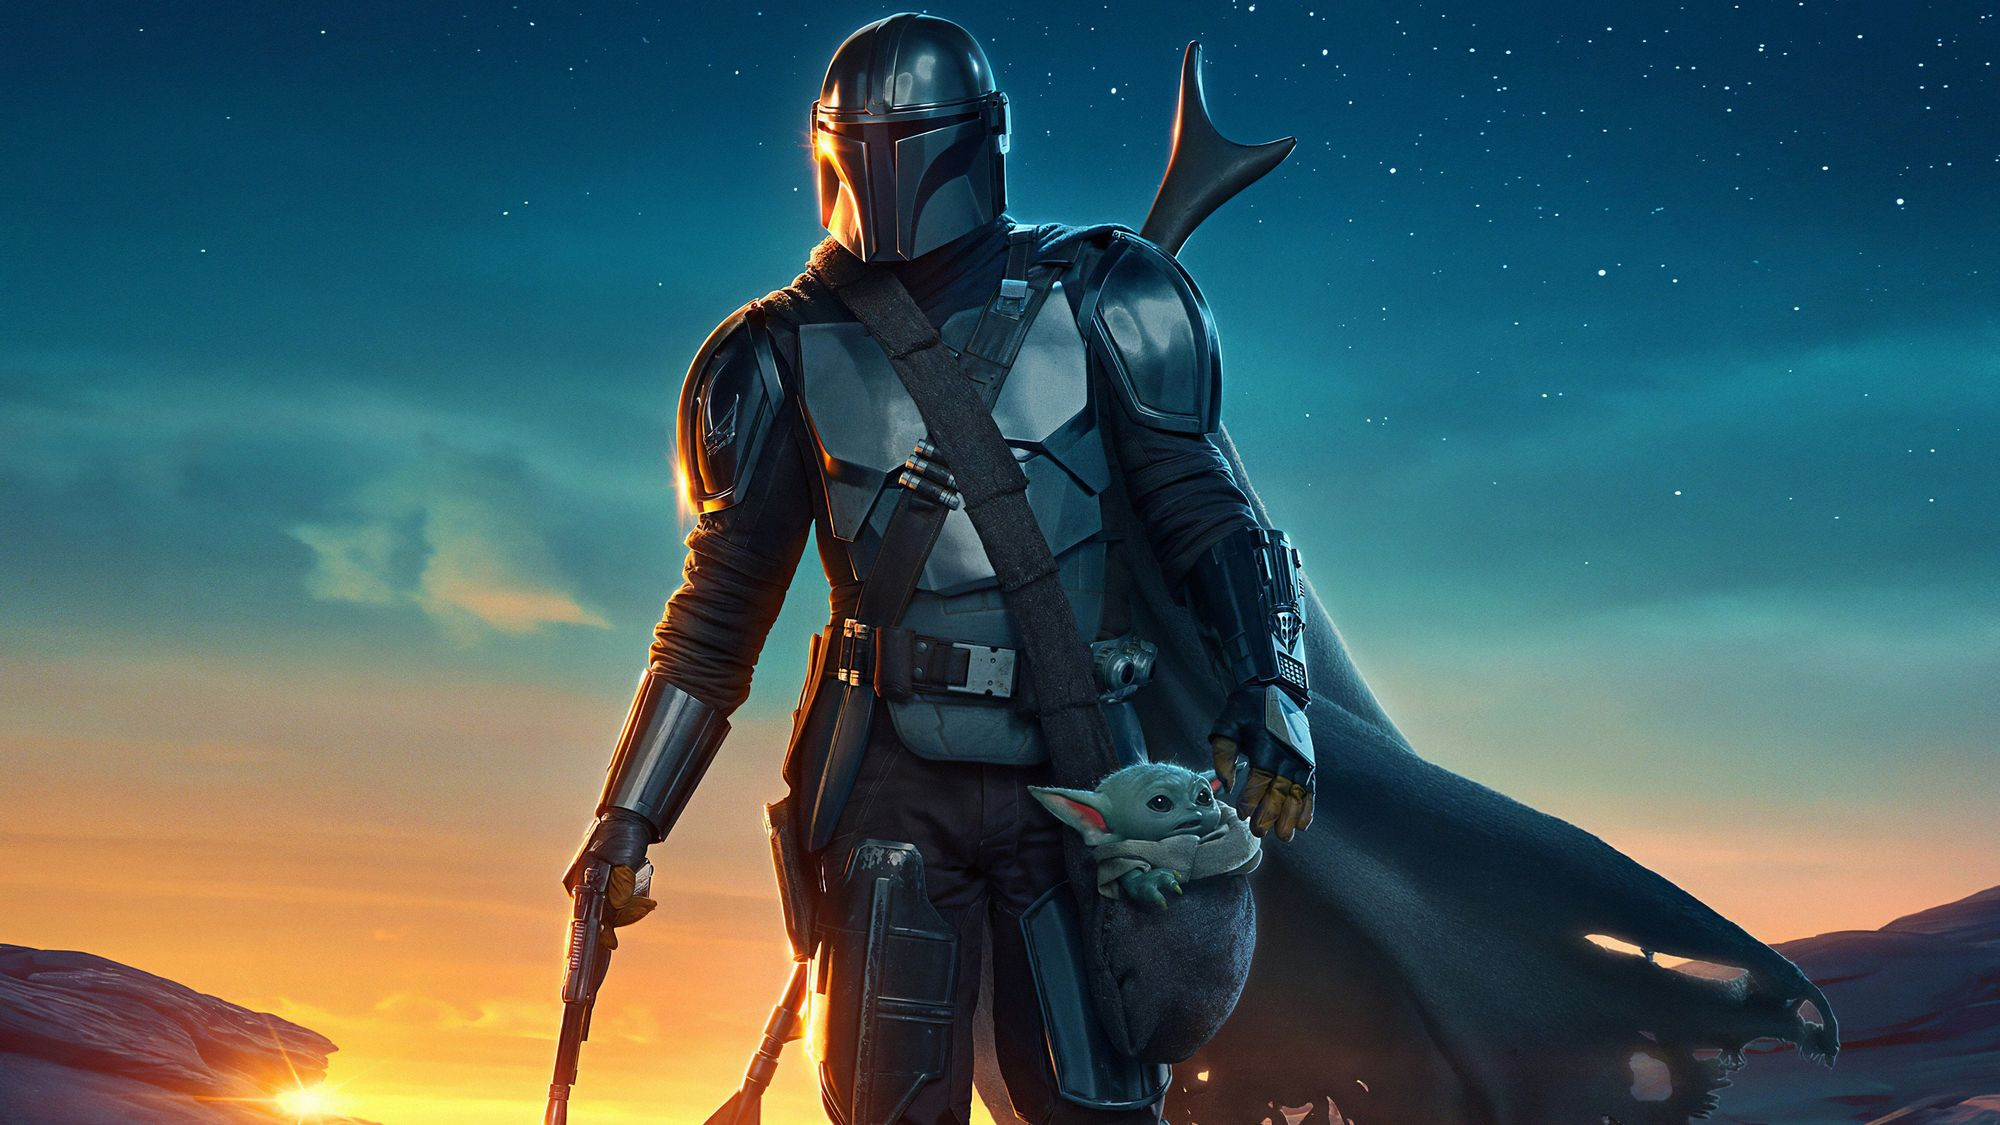

In [ ]:
# image = im.open("point_test.png").convert("RGB")  # локально
url = requests.get("https://w.forfun.com/fetch/1f/1f3dfbbb458cd69e92b3123e3d322819.jpeg?w=2000", stream=True)  # url
image = im.open(url.raw).convert("RGB")  # ...
width, height = image.size
array = np.array(image)  # изображение в массив (r, g, b)
image  # image.show()

Какой он?

In [ ]:
color = set_color(input("Какого цвета шум? Цвет: "))

Какого цвета шум? Цвет: 40


Его нет? Добавим!

Количество шума: 75
Цвет шума: 50
Шум там, где (r + g + b) < 350


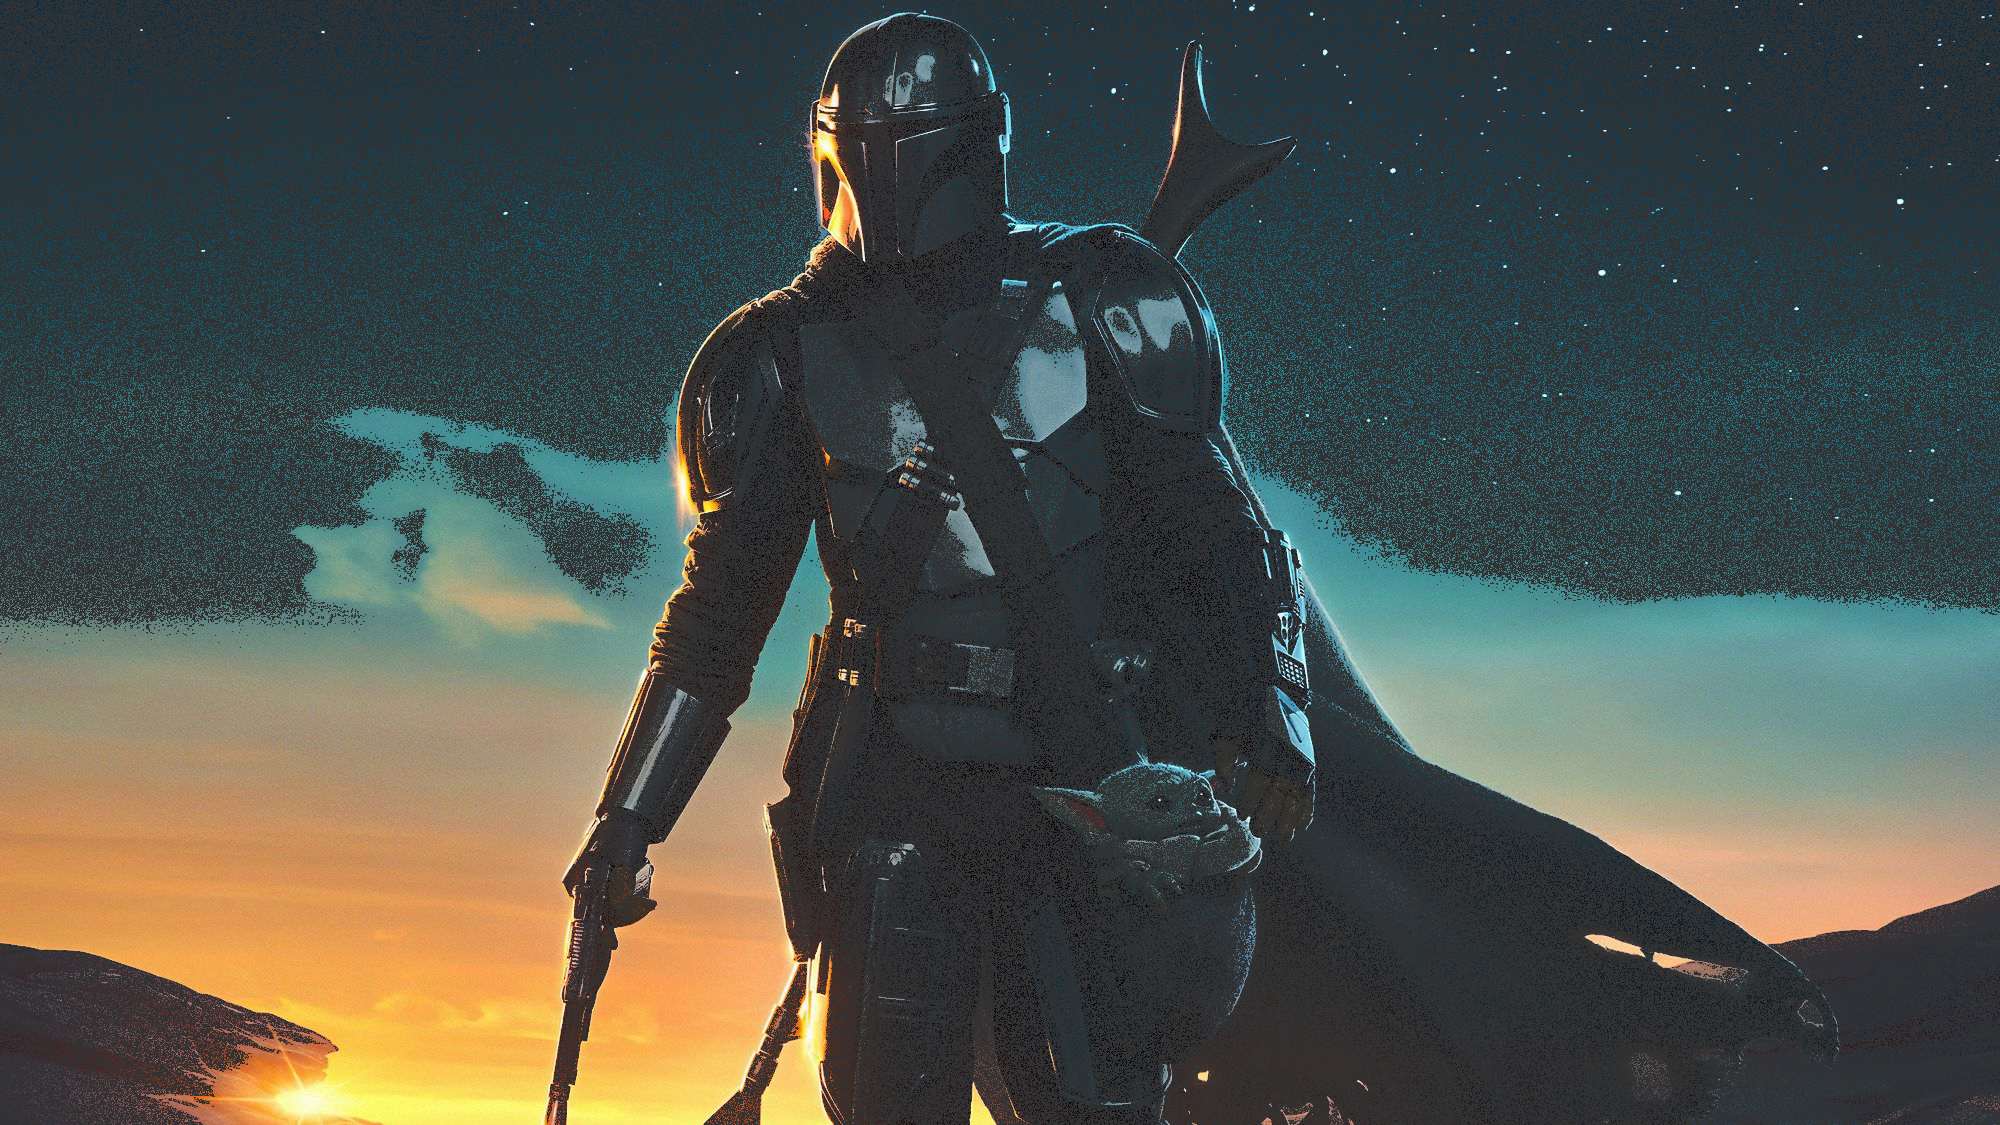

In [ ]:
level = int(input("Количество шума: "))  # [1, 100]
color = set_color(input("Цвет шума: "))
maxi = int(input("Шум там, где (r + g + b) < "))
noise = np.random.random(array.shape[:2]) < (level / 100)
rgb = np.sum(image, 2)  # сумма (r, g, b)
array[noise & (rgb < maxi)] = color
im.fromarray(array)

Долой его!

In [ ]:
radius = int(input("Радиус размытия: "))
bound = sum(color) / 3 + 10  # шум ниже этого значения
stop = 0  # чем меньше, тем дольше
marked = mark(array, bound)
fuzzy = blur(image, radius)
merged = merge(marked, fuzzy, array)
difference = np.mean(abs(merged - array))
while difference > stop:
    image = im.fromarray(merged)
    bound = np.mean(marked * fuzzy)
    array = merged
    marked = mark(array, bound)
    fuzzy = blur(image, radius)
    merged = merge(marked, fuzzy, array)
    difference = np.mean(abs(merged - array))

Радиус размытия: 2


Ух!

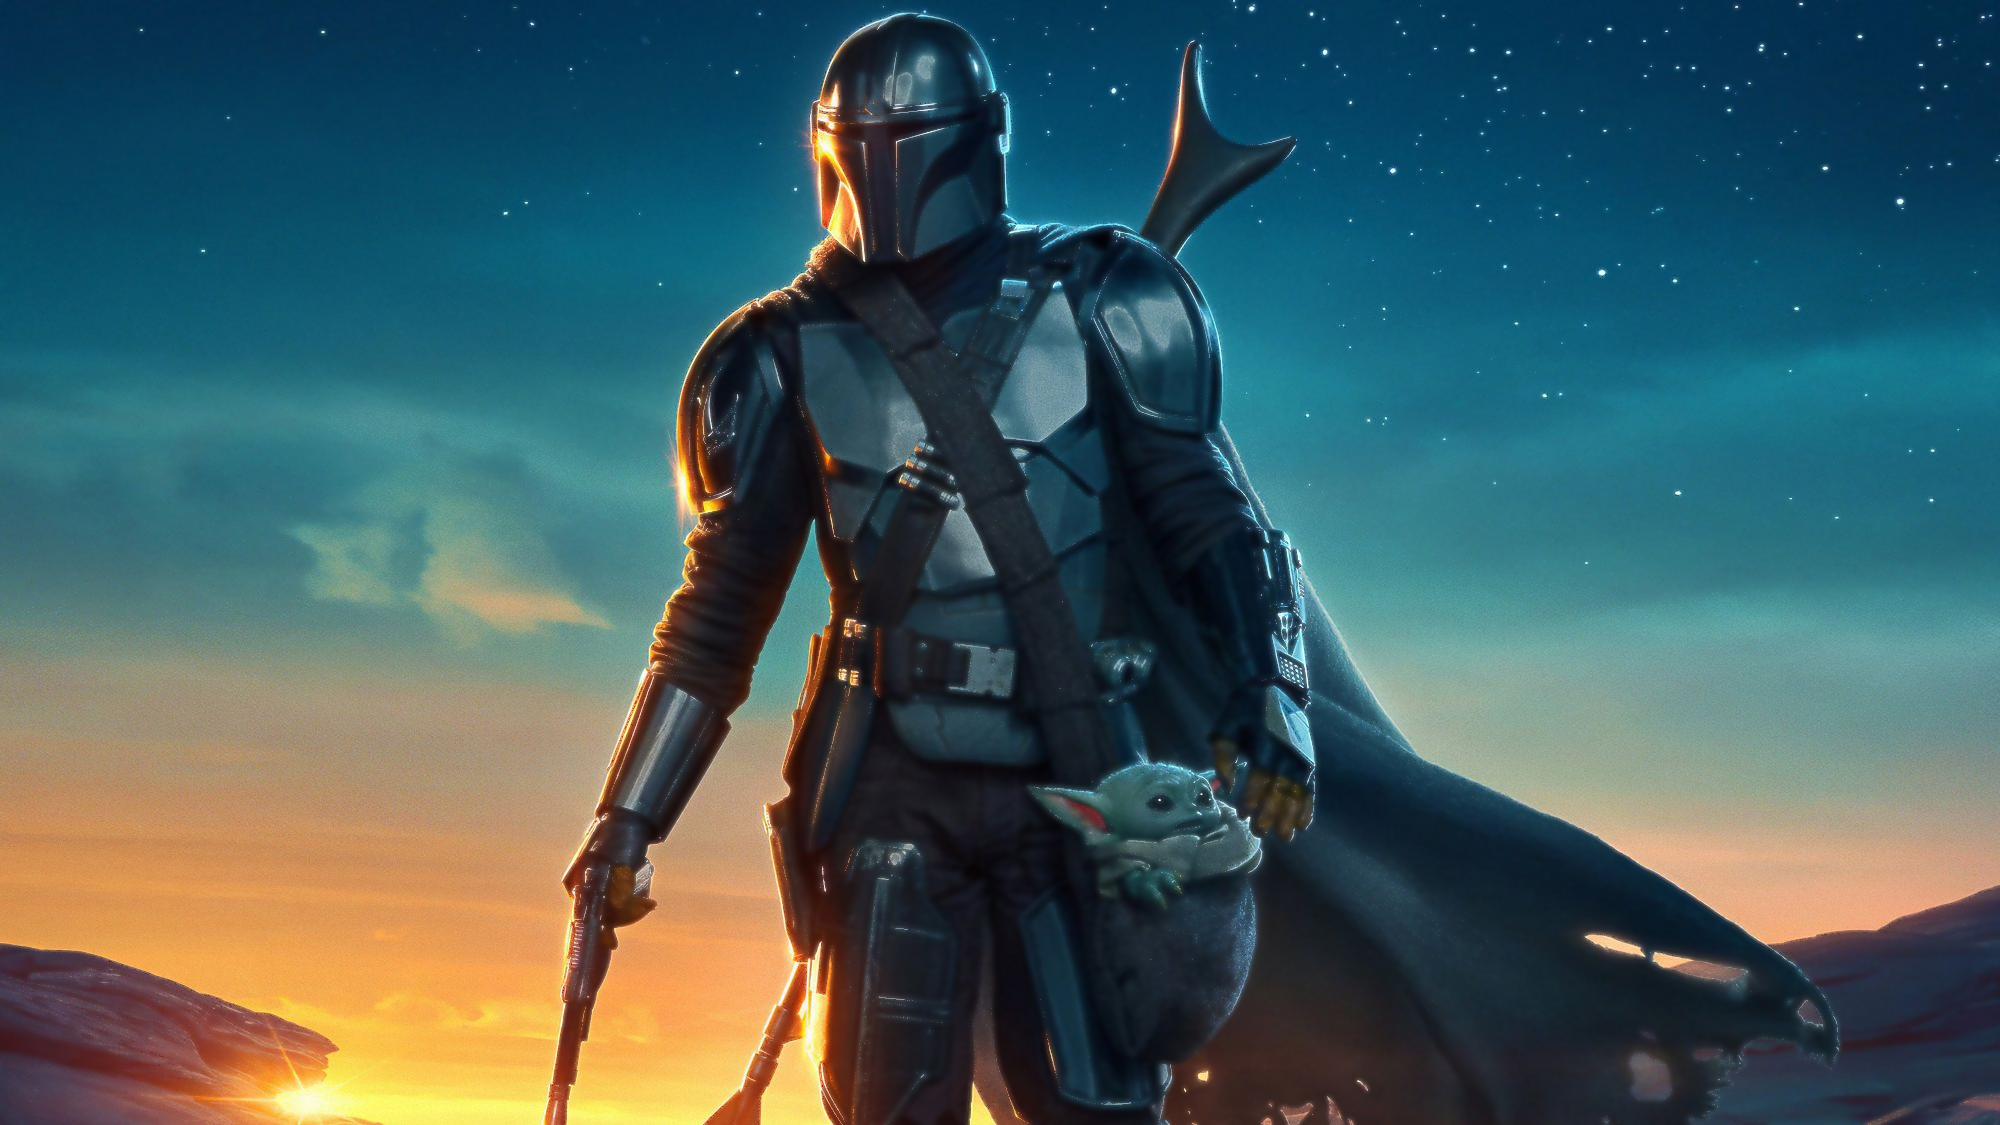

In [ ]:
im.fromarray(merged)  # массив в изображение